In [1]:
import tensorflow as tf
from tensorflow.contrib.framework.python.ops.variables import get_or_create_global_step
import inception_preprocessing
from inception_resnet_v2 import inception_resnet_v2, inception_resnet_v2_arg_scope
import time
import os
import cv2 as cv
import sys
import random
import numpy as np
from load_data import get_split, load_batch
from param import *
import matplotlib.pyplot as plt
plt.style.use('ggplot')

/usr/local/lib/python2.7/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
slim = tf.contrib.slim
log_dir = "./log"
dataset_dir = './dataset'
batch_size = 16
num_epochs = 1
num_samples = 3333
checkpoint_file_ = tf.train.latest_checkpoint(log_dir)

In [6]:
with tf.Graph().as_default() as graph:
    dataset = get_split('train', dataset_dir, file_pattern)
    images, raw_images, labels = load_batch(dataset, batch_size=batch_size, height=image_size, width=image_size)
    num_batches_per_epoch = num_samples / batch_size
    num_steps_per_epoch = num_batches_per_epoch
    
    with slim.arg_scope(inception_resnet_v2_arg_scope()):
        logits, end_points = inception_resnet_v2(images, num_classes=dataset.num_classes, is_training=False)
    
    variables_to_restore = slim.get_variables_to_restore()
    saver = tf.train.Saver(variables_to_restore)
        
    def restore_fn(sess):
        return saver.restore(sess, checkpoint_file_)
     
    #predictions = tf.argmax(end_points["Predictions"], 1)
    
    sv = tf.train.Supervisor(logdir=None, summary_op = None, saver = None, init_fn = restore_fn)
    #number_temp = 0
    with sv.managed_session() as sess:
        for step in xrange(1):
            Raw_images, Labels, End_points = sess.run([raw_images,labels, end_points["Conv2d_7b_1x1"]])

INFO:tensorflow:Restoring parameters from ./log/model.ckpt-52000
INFO:tensorflow:Starting standard services.
INFO:tensorflow:Starting queue runners.


In [9]:
print End_points.shape
print np.mean(End_points, 3)

(16, 8, 8, 1536)
[[[0.17672879 0.1585607  0.1855496  ... 0.23515725 0.3903097  0.25046405]
  [0.19646184 0.1758718  0.23413634 ... 0.23526347 0.30227557 0.21253043]
  [0.14165236 0.19180663 0.15587725 ... 0.29647166 0.22726972 0.22932787]
  ...
  [0.42308378 0.19754887 0.10846392 ... 0.34920597 0.3634183  0.5743997 ]
  [0.48773637 0.3021668  0.26882836 ... 0.30996764 0.29136607 0.6018129 ]
  [0.4929234  0.3196621  0.33117506 ... 0.36132845 0.32915798 0.4944055 ]]

 [[0.38010135 0.39311707 0.29816797 ... 0.38933754 0.45175943 0.6434462 ]
  [0.2964486  0.28546438 0.22336455 ... 0.39989534 0.5576827  0.7812254 ]
  [0.29924205 0.25632998 0.18239959 ... 0.33884907 0.48761463 0.7814347 ]
  ...
  [0.5417684  0.2927013  0.16421026 ... 0.20930944 0.28976122 0.5450439 ]
  [0.6388046  0.40217105 0.25786647 ... 0.270936   0.516746   0.8104947 ]
  [0.5598194  0.34007418 0.3169272  ... 0.3712369  0.44499993 0.5342739 ]]

 [[0.6990678  0.37598118 0.4150459  ... 0.5000606  0.47487137 0.46492568]
  [0.

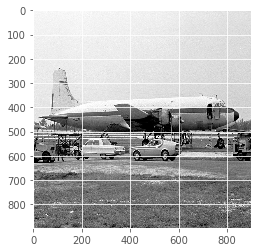

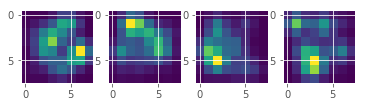

In [36]:
mask = mask_0 + mask_1 + mask_2 + mask_3
index = 9

plt.imshow(Raw_images[index,:,:,:])
plt.show()

plt.figure()
plt.subplot(141) 
plt.imshow(mask_0[index,:,:,0])
plt.subplot(142) 
plt.imshow(mask_1[index,:,:,0])
plt.subplot(143) 
plt.imshow(mask_2[index,:,:,0])
plt.subplot(144) 
plt.imshow(mask_3[index,:,:,0])
plt.show()

#plt.imshow(mask[index,:,:,0])
#plt.show()

In [17]:
def min_max(a):
    amin, amax = a.min(), a.max() 
    a = (a-amin)/(amax-amin) 
    return a

In [30]:
print Raw_images.shape, End_points.shape
print min_max(End_points[0,:,:,:])
print min_max(End_points[5,:,:,:])

(16, 897, 897, 3) (16, 1, 1, 36)
[[[4.0929476e-03 1.9034488e-02 8.2899042e-04 4.1079104e-01 4.0773764e-01
   3.5884937e-03 3.7265126e-02 1.8464327e-01 2.1594638e-01 9.1687180e-02
   5.7435092e-03 9.8053562e-03 7.4233972e-02 4.0761616e-02 7.5371706e-01
   5.7450812e-03 2.9934540e-02 1.5522011e-03 0.0000000e+00 3.3653757e-01
   3.5637844e-04 5.3020716e-03 3.0969288e-03 1.0000000e+00 5.7299649e-03
   1.4408275e-02 1.4345632e-01 1.7522530e-03 3.1578097e-01 9.1628760e-02
   3.3187926e-02 4.8433002e-03 6.2585324e-02 2.5149348e-01 1.7680446e-02
   1.0783010e-02]]]
[[[0.05393148 0.09033021 0.01907832 0.55829424 0.6577986  0.04080242
   0.11550983 0.3213635  0.34342209 0.30224332 0.04438139 0.08788091
   0.24557494 0.17784786 0.64210427 0.08160164 0.18161248 0.03154451
   0.         0.4983971  0.00675724 0.05896722 0.03698588 1.
   0.05443004 0.09632512 0.34136522 0.02723293 0.4617869  0.19990379
   0.16661038 0.0661312  0.18251476 0.38767108 0.0876906  0.06510973]]]


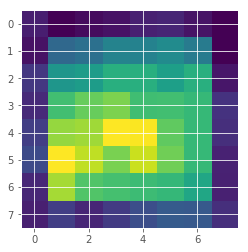

In [31]:
f_img = np.mean(End_points,3)
plt.imshow(f_img[4,:,:])
plt.show()